# The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)

In [3]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
X[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [4]:
y = (iris.target == 0).astype(int) # If is iris setosa or not
y[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: target, dtype: int64

In [5]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [6]:
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new) # Predicts True and False for these 2 flowers
y_pred.astype(bool)

array([ True, False])

## The Multilayer Perceptron and Backpropagation

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
housing = fetch_california_housing()

In [9]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

In [10]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)

In [11]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [12]:
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
print(f"RMSE: {rmse}")

RMSE: 0.5053326657968586


## Implementing MLPs with Keras

In [48]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load the dataset

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [23]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.9166666, random_state=42)

In [35]:
X_train.shape, X_train.dtype

((5000, 28, 28), dtype('uint8'))

In [36]:
X_valid.shape, X_valid.dtype

((55000, 28, 28), dtype('uint8'))

## Rescale the pixel intesities down to the 0-1 range

In [37]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [39]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [40]:
np.min(X_valid), np.max(X_valid)

(0.0, 1.0)

In [41]:
np.min(X_test), np.max(X_test)

(0.0, 1.0)

## Classes of the dataset

In [42]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [46]:
class_names[y_train[0]]

'Dress'

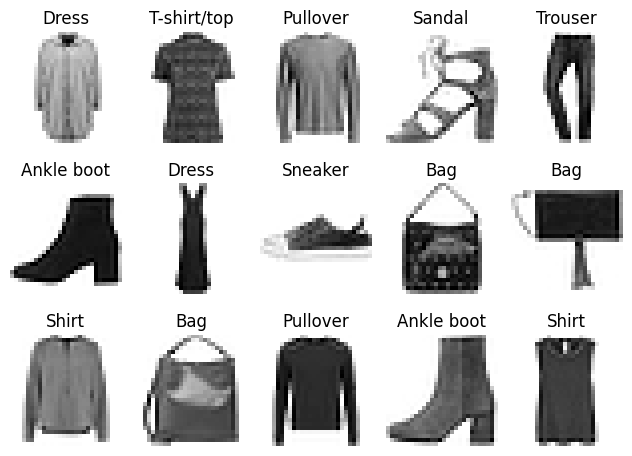

In [57]:
fig, ax = plt.subplots(3, 5)

for i in range(15):
    ax[i//5, i%5].imshow(X_train[i], cmap='binary')
    ax[i//5, i%5].set_title(class_names[y_train[i]])
    ax[i//5, i%5].axis('off')
plt.tight_layout(pad=1)
plt.show()

## Creating the model using the sequential API

In [58]:
tf.random.set_seed(42)

# Creation of the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

## Compiling the Model

In [60]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Training and evaluating the model

In [61]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=30, 
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.3924 - loss: 1.8803 - val_accuracy: 0.6495 - val_loss: 1.0792
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6905 - loss: 0.9786 - val_accuracy: 0.7069 - val_loss: 0.8393
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7437 - loss: 0.7857 - val_accuracy: 0.7361 - val_loss: 0.7487
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7720 - loss: 0.7007 - val_accuracy: 0.7530 - val_loss: 0.6963
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7871 - loss: 0.6466 - val_accuracy: 0.7657 - val_loss: 0.6605
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7996 - loss: 0.6079 - val_accuracy: 0.7748 - val_loss: 0.6347
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8150 - loss: 0.5775 - val_accuracy: 0.7814 - val_loss: 0.6151
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8200 - loss: 0.5523 - val_accu